3455   2020-01-01
3456   2020-01-02
3457   2020-01-03
3458   2020-01-04
3459   2020-01-05
          ...    
4697   2023-05-27
4698   2023-05-28
4699   2023-05-29
4700   2023-05-30
4701   2023-05-31
Name: timestamp, Length: 1247, dtype: datetime64[ns]


(18262.0, 19508.0)

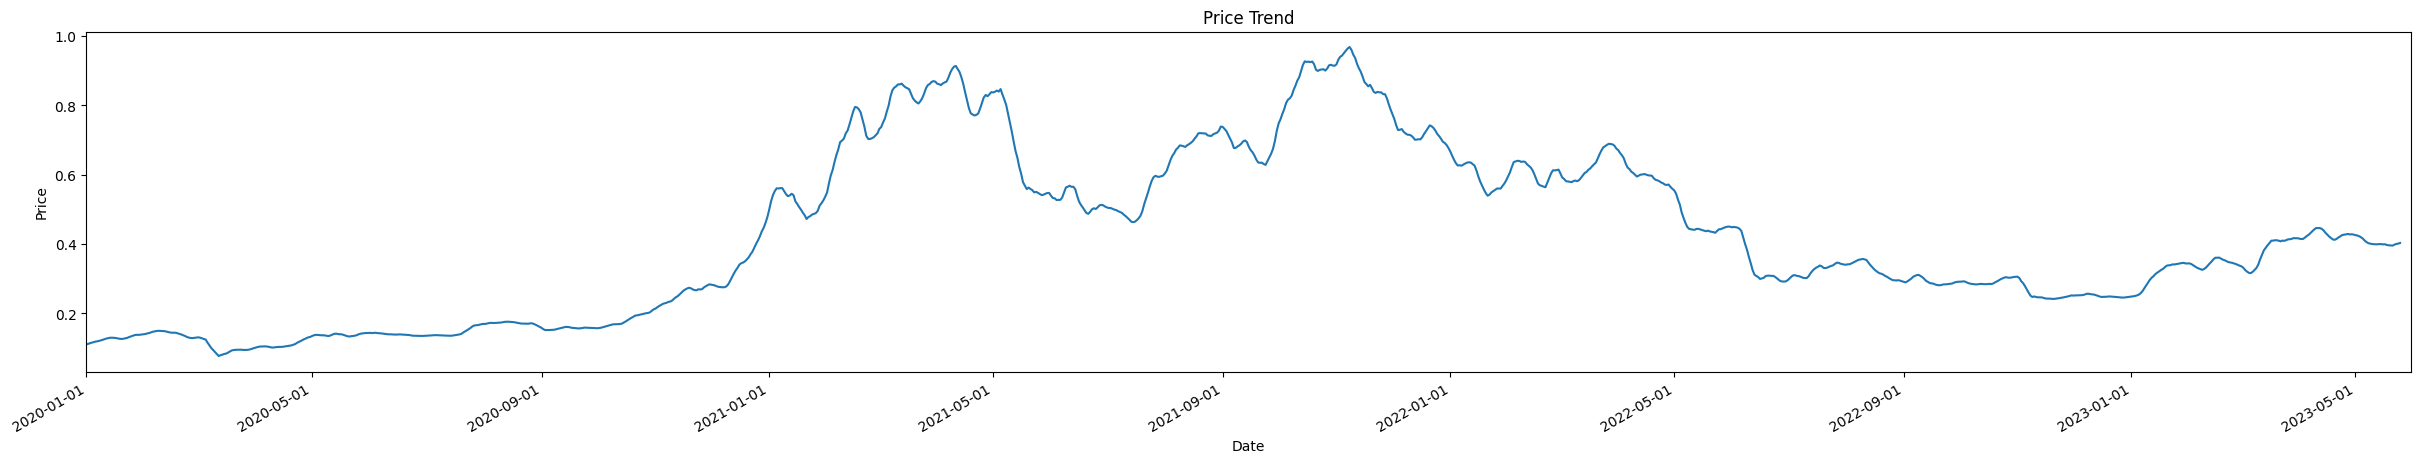

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('Price.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'])

scaler = MinMaxScaler()
df[['value']]= scaler.fit_transform(df[['value']])

start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2023-05-31')
df = df[(df['timestamp']>= start_date) & (df['timestamp'] <= end_date)]
df = df.sort_values('timestamp', ascending=True)


# filtered_df = df.loc[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

window_size = 7 # 窗口大小
# sentiment['pos'] = sentiment['pos'].rolling(window_size).mean()

df['value'] = df['value'].iloc[::-1].rolling(window_size).mean()[::-1]
# df.set_index('timestamp', inplace=True)
# df.index = df.index.shift(window_size, freq='D')
# sentiment = df.reset_index()



print(df['timestamp'])
dates = list(df['timestamp'])
prices = list(df['value'])

# prices
# 绘制价格走势图
plt.figure(figsize=(30, 5))
plt.plot(dates, prices)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trend')

plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-05-31'))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


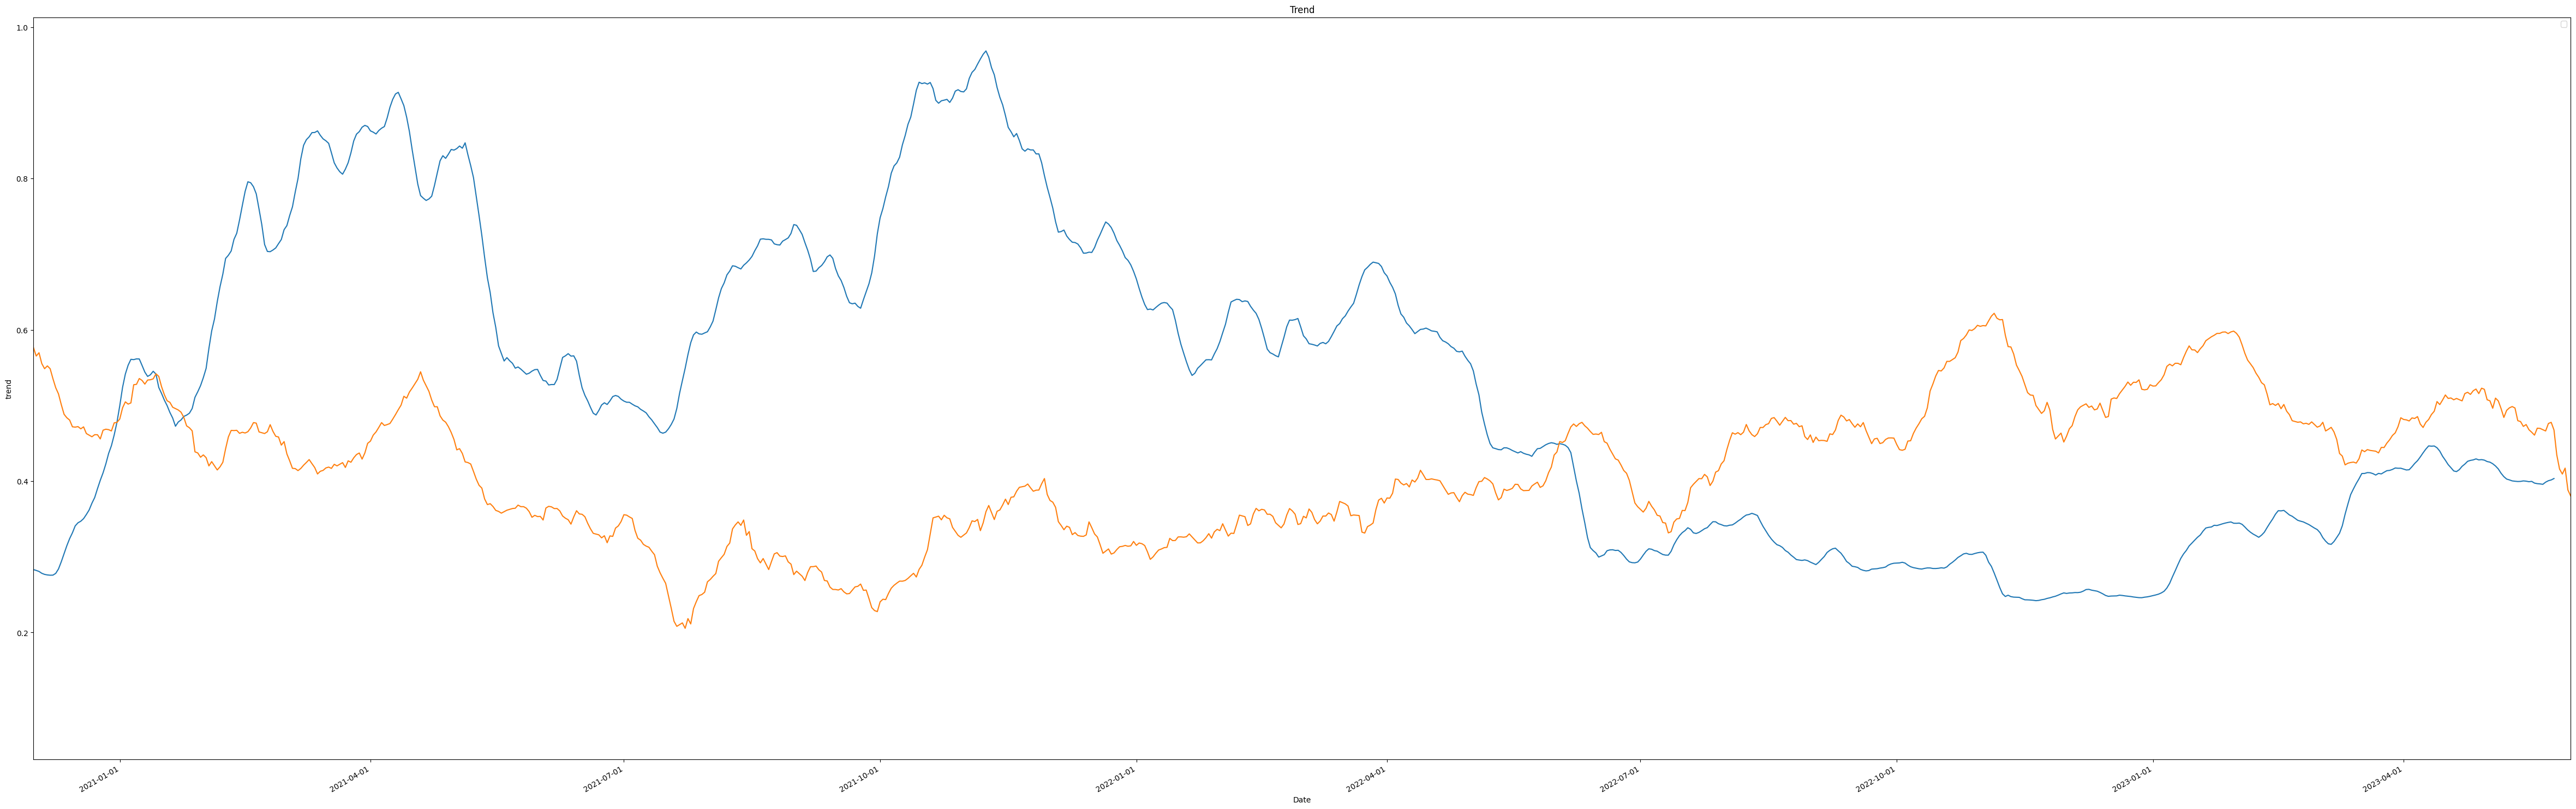

In [192]:
START = '2020-12-01'
END = '2023-05-31'
plt.figure(figsize=(60, 20))
plt.plot(dates, prices)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trend')
plt.xlim(pd.Timestamp(START), pd.Timestamp(END))




import re
from sklearn.preprocessing import MinMaxScaler

sentiment = pd.read_csv('infer_result_2020_2023.csv')
sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)

sentiment['scores']  = sentiment['scores'].astype('str')

sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)

# t = sentiment['scores'].str.split(pat='\n')
# t = t.map(lambda row: try: row[1]  except: 123)
# t
# sentiment['scores'].str.split(pat='\n').map(lambda row: len(row) <= 1)

# sentiment['neg'] = sentiment['scores'].str.split(pat='\n').map(lambda row: float(row[1][4:]) if row[1][4:] else 0)

# sentiment[['pos', 'neg', 'neu']] = sentiment['scores'].str.split(pat='\n').map(lambda row: [float(s.split('=')[1]) for s in row])

# sentiment['pos'] = sentiment['scores'].apply(lambda x: float(re.findall('pos=([\d.]+)', x)[0]))
# sentiment['neg'] = sentiment['scores'].apply(lambda x: float(re.findall('neg=([\d.]+)', x)[0]))
# sentiment['neu'] = sentiment['scores'].apply(lambda x: float(re.findall('neu=([\d.]+)', x)[0]))
# sentiment
# sentiment = sentiment.groupby(sentiment.index)['pos'].sum().tolist()
# sentiment['pred'].value_counts()

# print(sentiment)


# print(sentiment.groupby(sentiment.index)['date'])
sentiment = sentiment.groupby(sentiment.index)['pos'].sum().reset_index()

sentiment = sentiment[sentiment['pos']>10000]
sentiment = sentiment[sentiment['pos']<16000]
# print(sentiment[sentiment['pos']<10000])

scaler = MinMaxScaler()
sentiment[['pos']]= scaler.fit_transform(sentiment[['pos']])

window_size = 14 # 窗口大小
# sentiment['pos'] = sentiment['pos'].rolling(window_size).mean()

sentiment['pos'] = sentiment['pos'].iloc[::-1].rolling(window_size).mean()[::-1]

sentiment.set_index('date', inplace=True)
sentiment.index = sentiment.index.shift(window_size, freq='D')
sentiment = sentiment.reset_index()

# sentiment['date'] = sentiment['date'].shift(7, freq='D')


trend = sentiment['pos'].tolist()
sen_dates = sentiment['date'].tolist()
# 绘制价格走势图
plt.plot(sen_dates, trend)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('trend')
plt.title('Trend')

plt.xlim(pd.Timestamp(START), pd.Timestamp(END))
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          date       pos  timestamp     value
0   2020-10-24  0.630365 2020-10-24  0.196861
1   2020-11-07  0.623617 2020-11-07  0.230909
2   2020-11-22  0.606695 2020-11-22  0.267394
3   2020-11-23  0.599746 2020-11-23  0.266846
4   2020-11-24  0.598388 2020-11-24  0.269697
..         ...       ...        ...       ...
888 2023-05-27  0.415921 2023-05-27       NaN
889 2023-05-28  0.409324 2023-05-28       NaN
890 2023-05-29  0.417162 2023-05-29       NaN
891 2023-05-30  0.388235 2023-05-30       NaN
892 2023-05-31  0.380344 2023-05-31       NaN

[893 rows x 4 columns]
皮尔森相关系数为: nan


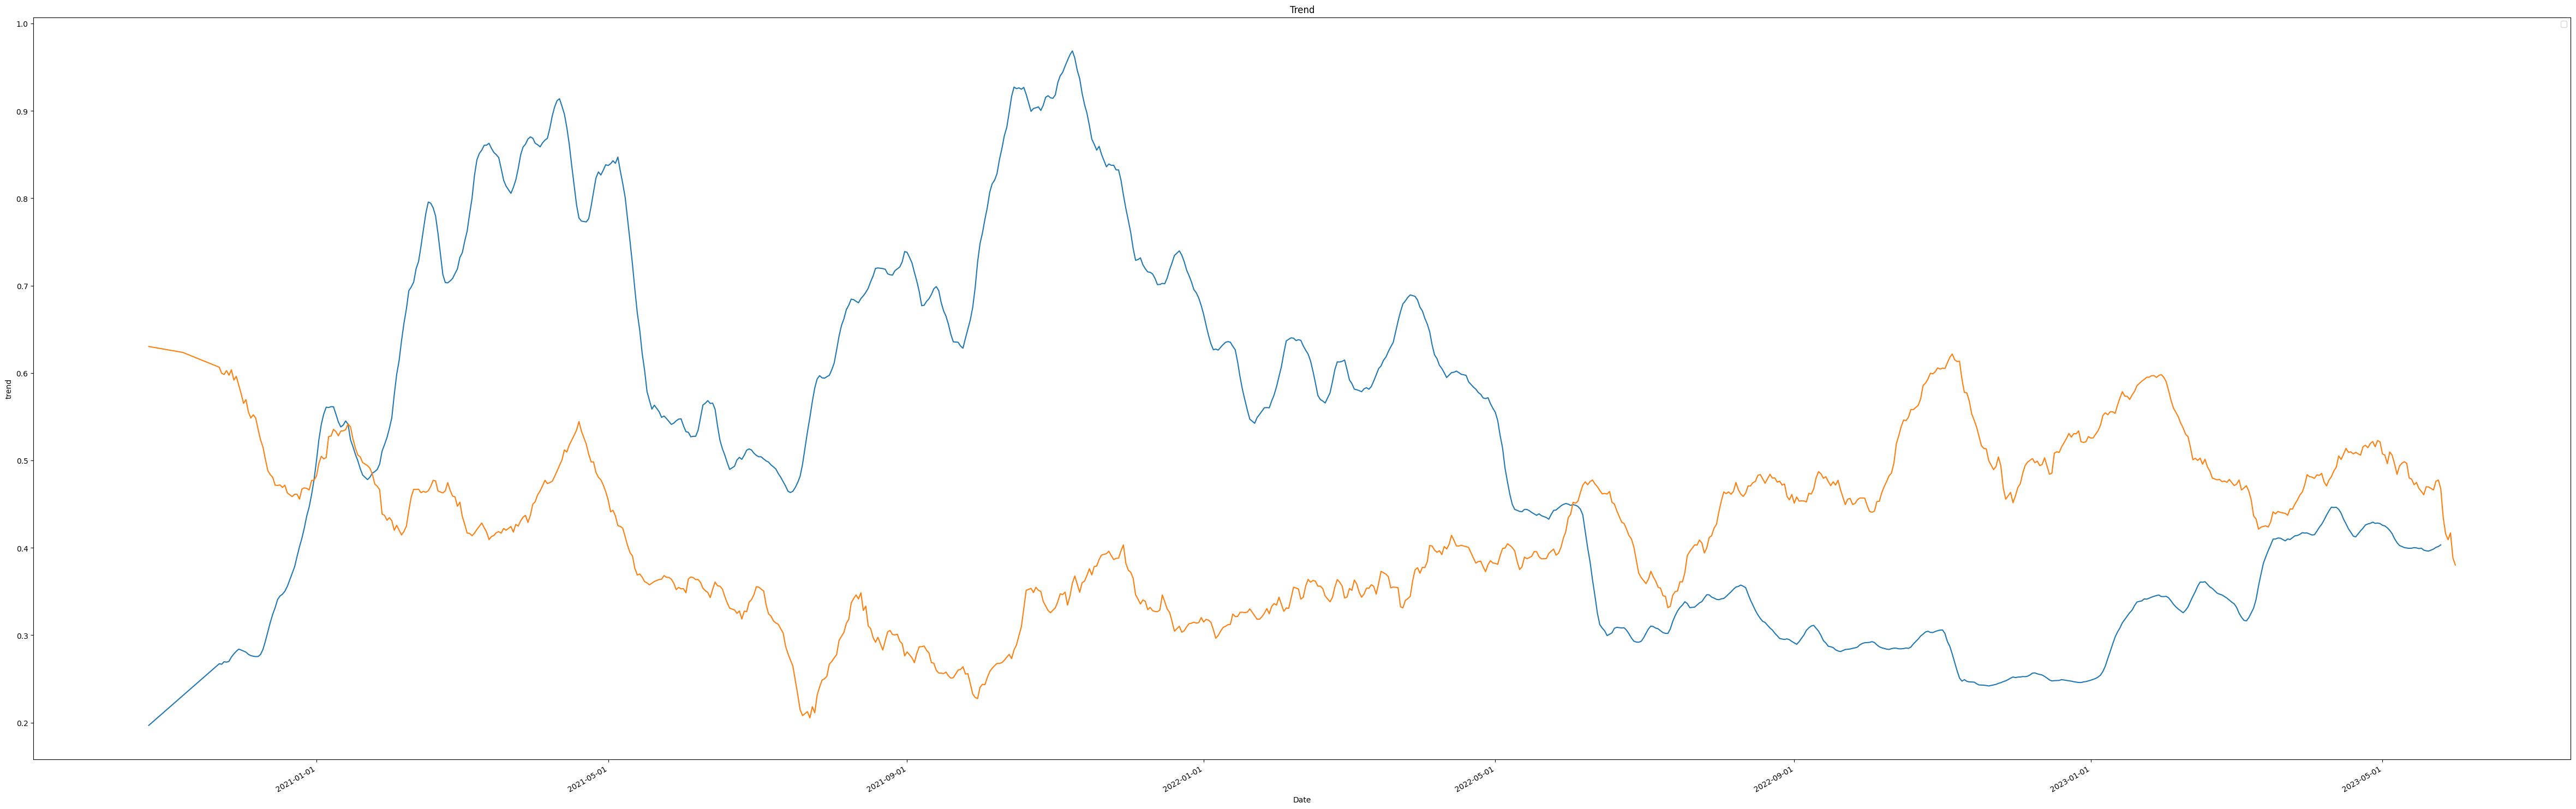

In [193]:
# print(len(sentiment))
# print(len(prices))
# print(sentiment)
# print(df)
# print(sentiment)
sentiment = sentiment[sentiment['pos'].notnull()]
join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
print(join)

import numpy as np

t1 = join['pos'].to_list()
t2 = join['value'].to_list()
date = join['date'].to_list()

corr = np.corrcoef(t1, t2)[0, 1]

print("皮尔森相关系数为:", corr)



# 计算两个数组的差分
arr1_diff = np.diff(t1)
arr2_diff = np.diff(t2)



# # 计算两个数组的相关系数
# corr = np.corrcoef(arr1_diff, arr2_diff)[0][1]

# print('arr1_diff 和 arr2_diff 的相关系数为：', round(corr, 4))

plt.figure(figsize=(60, 20))
plt.plot(date, t2)
plt.plot(date, t1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('trend')
plt.title('Trend')

# plt.xlim(pd.Timestamp(START), pd.Timestamp(END))
plt.legend()
plt.show()



In [33]:
sentiment = pd.read_csv('infer_result.csv')
sentiment['date'] = pd.to_datetime(sentiment['day'])

# 将日期列设置为索引
sentiment.set_index('date', inplace=True)

# # 按天统计事件数量
daily_count = sentiment.groupby(['date'])['pred'].value_counts()
print(daily_count)

sentiment['indicator'] = sentiment['pred'].apply(lambda x: 1 if x=='pos' else (-1 if x=='negative' else 0))
sentiment_pivot = pd.pivot_table(sentiment, index=sentiment.index, columns='pred', values='indicator', aggfunc='sum', fill_value=0)
sentiment_pivot['indicator'] = sentiment_pivot['pos'] + sentiment_pivot['negative']
sentiment_pivot['indicator']


count = (sentiment_pivot['indicator'] > 0).sum()

# 输出结果
print(count)


date        pred    
2021-01-01  pos         331
            negative     86
            neut         38
2021-01-02  pos         318
            negative    113
                       ... 
2021-12-30  pos         274
            negative    110
            neut         54
2021-12-31  pos           3
            negative      2
Name: count, Length: 1231, dtype: int64
361
